**Creation of simulated dataset of climate variables, based on Phoenix Park, Dublin weather station**   
As explained in the README file for this repository, this notebook aims to generate simulated data, based on analysis of government provided actual readings, for rainfall, atmospheric pressure, and minimum and maximum temperatures on a daily basis from the Phoenix Park weather station.  

Climate predictions are of highly significant importance with concerns about human induced global warming.  

The actual historical data was downloaded from the government website into an Excel spreadsheet, and then exported to a csv file. The non-data header rows, plus columns for variables that are not being examined have been removed from the file, along with incomplete rows of data.  

The pandas, matplotlib and scipy packages are imported for processing the input data, and numpy is used to generate random, simulated data.  

The csv file is first loaded into a Pandas dataframe, and we get the data type for each column :  
(ref https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/)  
(ref https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from numpy.polynomial.polynomial import polyfit
df = pd.read_csv('Phoenix Park weather data.csv')
print (df.dtypes)

date      object
maxtp    float64
mintp    float64
rain     float64
cbl      float64
dtype: object


'cbl' is the 'convective boundary layer' - the layer of the earth's atmosphere most affected by the heating effect of the sun on the earth's surface. So the 'cbl' column here, which is for a ground based weather station, is the atmospheric pressure at ground level.  
(ref https://en.wikipedia.org/wiki/Convective_planetary_boundary_layer)

Display the first few rows from the spreadsheet and count the number of rows :  
(ref https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)    
(ref https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe)

In [115]:
print(df.iloc[0:12],0)
print(' ')
print('Number of rows ' , len(df.index))

         date  maxtp  mintp  rain     cbl
0   01-Jan-06    8.2    2.9   0.0  1002.8
1   02-Jan-06   10.6    0.7   0.0  1016.5
2   03-Jan-06   10.9    0.0   0.2  1020.5
3   04-Jan-06    7.2   -1.6   0.0  1022.5
4   05-Jan-06    6.4    4.1   0.0  1014.6
5   06-Jan-06    5.1    1.1   0.0  1015.6
6   07-Jan-06    4.7    1.7   0.0  1017.9
7   08-Jan-06    5.9   -2.7   1.3  1019.2
8   09-Jan-06   10.5   -4.2   0.0  1014.5
9   10-Jan-06   12.9    8.0   9.6  1002.3
10  11-Jan-06    9.0    4.1   0.3  1007.6
11  12-Jan-06   12.5    4.6   0.0  1011.6 0
 
Number of rows  4742


There are many data rows, so make sure programatically that none of them contain null values - as this would affect the statistical values such as 'mean' that will be used to create the simulated data.  
(ref https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe)

In [116]:
#print(df.iloc[0])
for col in df.columns: 
    print(col)

date
maxtp
mintp
rain
cbl


Break down the actual data by month, so we can build up our simulated data on a monthly basis. Extract the data for each month into a separate dataframe, to make it easy to plot and analyse at this scale :  
(ref https://stackoverflow.com/questions/27975069/how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe)

In [117]:
y=df['date'].str[7:9].unique()
yearx=[]
years=[]
for i in y:
    yearx.append('-'+i)
    years.append('20'+i)

(ref https://stackoverflow.com/questions/733454/best-way-to-format-integer-as-string-with-leading-zeros)

In [227]:
import datetime
year=datetime.date.today().year
if (year+1) % 4 == 0:
   ndays=[31,29,31,30,31,30,31,31,30,31,30,31] 
   numdays=366
else:
   ndays=[31,28,31,30,31,30,31,31,30,31,30,31]  
   numdays=365
mfac=(year-2012)+0.5
year = str((year)+1)
yx=year[2:]

odates=[]
ix=0
for n in ndays:
    for i in range(n):
       iy=str((i+1)).zfill(2)
       odates.append(iy+'-'+months[ix]+'-'+yx)
    ix+=1 
print(ndays)    
print(odates)    
        

[31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
['01-Jan-20', '02-Jan-20', '03-Jan-20', '04-Jan-20', '05-Jan-20', '06-Jan-20', '07-Jan-20', '08-Jan-20', '09-Jan-20', '10-Jan-20', '11-Jan-20', '12-Jan-20', '13-Jan-20', '14-Jan-20', '15-Jan-20', '16-Jan-20', '17-Jan-20', '18-Jan-20', '19-Jan-20', '20-Jan-20', '21-Jan-20', '22-Jan-20', '23-Jan-20', '24-Jan-20', '25-Jan-20', '26-Jan-20', '27-Jan-20', '28-Jan-20', '29-Jan-20', '30-Jan-20', '31-Jan-20', '01-Feb-20', '02-Feb-20', '03-Feb-20', '04-Feb-20', '05-Feb-20', '06-Feb-20', '07-Feb-20', '08-Feb-20', '09-Feb-20', '10-Feb-20', '11-Feb-20', '12-Feb-20', '13-Feb-20', '14-Feb-20', '15-Feb-20', '16-Feb-20', '17-Feb-20', '18-Feb-20', '19-Feb-20', '20-Feb-20', '21-Feb-20', '22-Feb-20', '23-Feb-20', '24-Feb-20', '25-Feb-20', '26-Feb-20', '27-Feb-20', '28-Feb-20', '29-Feb-20', '01-Mar-20', '02-Mar-20', '03-Mar-20', '04-Mar-20', '05-Mar-20', '06-Mar-20', '07-Mar-20', '08-Mar-20', '09-Mar-20', '10-Mar-20', '11-Mar-20', '12-Mar-20', '13-Mar-20', '

Analysis of Irish climate records by a team at Maynooth university on behalf of the Environmental Protection Agency demonstrate that a Gamma probability distribution may be used to model winter and summer precipitation levels, and a Normal distribution for summer temperatures.  
http://www.epa.ie/pubs/reports/research/climate/Reserach_Report_277.pdf

Plot histograms for each month for each of the variables 'Max Temp', 'Min Temp', 'Rain' and 'Cbl' (pressure), to get an idea of what their distributions look like for this dataset. Use tight_layout so the title and axes labels don't overlap. Start with Max Temp:   
(ref https://stackoverflow.com/questions/47467077/python-plot-multiple-histograms)  
(ref https://matplotlib.org/users/tight_layout_guide.html)

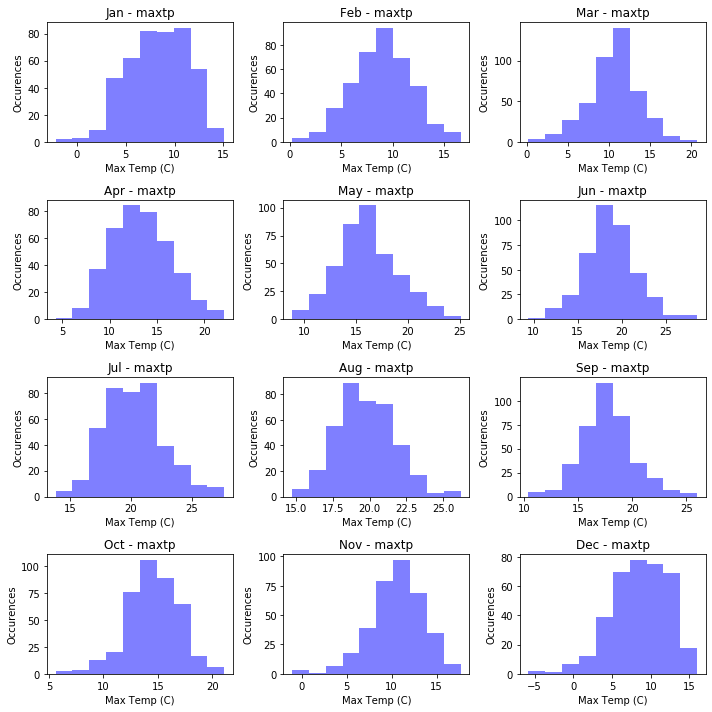

In [120]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
i = 0
for i1 in range(4):
    for i2 in range(3):
        ax = axes[i1][i2]
        ax.hist(mx[i]['maxtp'], bins=10, color='blue', alpha=0.5)
        ax.set_xlabel('Max Temp (C)')
        ax.set_title(months[i] + " - maxtp")
        ax.set_ylabel('Occurences')
        i+= 1

plt.tight_layout()
plt.show()

#plt.hist(np.random.gamma(0.3,5,395))

It looks like the data for some months has a Normal distribution, but perhaps not for other months, eg December which is skewed to the right. Use a statistical test to check for Normality - the Shapiro-Wilks test. Put which ones are Normal into 'norm', and the others into 'nonnorm'.  
(ref https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

In [121]:
from scipy.stats import shapiro
i=0
norm=[]
nonnorm=[]
for i in range(12):
    stat, p = shapiro(mx[i]['maxtp'])
    alpha = 0.05
    if p > alpha:
        print(months[i], " 'maxtp' - sample looks Normal")
        norm.append(i)
    else:
        print(months[i], " 'maxtp' - sample does not look Normal")
        nonnorm.append(i)
    i+=1 

Jan  'maxtp' - sample does not look Normal
Feb  'maxtp' - sample looks Normal
Mar  'maxtp' - sample does not look Normal
Apr  'maxtp' - sample looks Normal
May  'maxtp' - sample does not look Normal
Jun  'maxtp' - sample looks Normal
Jul  'maxtp' - sample does not look Normal
Aug  'maxtp' - sample does not look Normal
Sep  'maxtp' - sample does not look Normal
Oct  'maxtp' - sample does not look Normal
Nov  'maxtp' - sample does not look Normal
Dec  'maxtp' - sample does not look Normal



The data for many of the months are not Normally distributed. One way to generate random data to simulate actual values is to generate a Kernel Density Estimate (KDE), which estimates the probability density function of the variable, and then to sample data from that estimate.
  
(ref https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python)  
(ref https://stackoverflow.com/questions/35434363/python-generate-random-values-from-empirical-distribution)   
(ref https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/)

Check first how this works for December for Max Temp :
(ref https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html)

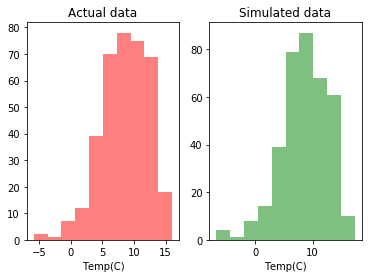

In [122]:
#Create a list that we'll put our simulated data in
sim_maxtp=[0]*12

# Count how many values we have
num=len(mx[11]['maxtp'])

# Define our actual values as being for December 'maxtp' 
actual_values = mx[11]['maxtp']

# Generate a KDE from the empirical sample
sample_pdf = scipy.stats.gaussian_kde(actual_values)

# Generate a random sample from the KDE
sim_maxtp[11] = sample_pdf.resample(num).T[:,0]

# Plot two histograms side by side
fig, ax = plt.subplots(1,2)
ax[0].hist(mx[11]['maxtp'], alpha = 0.5, color = 'r')
ax[0].set_title('Actual data')
ax[0].set_xlabel('Temp(C)')
ax[1].hist(sim_maxtp[11], alpha = 0.5, color = 'g')
ax[1].set_title('Simulated data')
ax[1].set_xlabel('Temp(C)')
plt.show()

This gives us the same basic shape for the data. We'll use this method to generate our simulated data for the rest of the months that are not Normal (Jan, Mar, May, Jul, Aug, Sep, Oct, Nov), and numpy.random for those that are according to the Shapiro-Wilk test above (Feb, Apr and Jun).  
Start with the non-Normal months, using the method above for December:

In [123]:
for i in nonnorm:
   num=len(mx[i]['maxtp'])
   actual_values = mx[i]['maxtp']
   sample_pdf = scipy.stats.gaussian_kde(actual_values)
   sim_maxtp[i] = sample_pdf.resample(num).T[:,0]

Get the mean and standard deviation for Feb, Apr and Jun, so we can generate the random simulated data using numpy.random.  
(ref https://www.geeksforgeeks.org/python-pandas-dataframe-mean/)

In [124]:
means=[0]*12
stds =[0]*12
for i in norm:
   means[i]=(mx[i]['maxtp'].mean())
   stds[i] =(mx[i]['maxtp'].std())

Generate random values for Feb and check the histograms of actual and generated data:

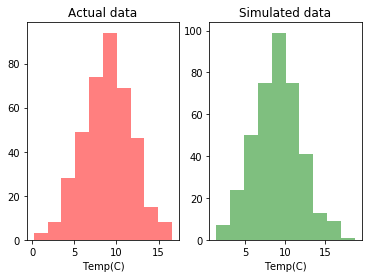

In [125]:
num=len(mx[1]['maxtp'])
sim_maxtp[1]=np.random.normal(means[1],stds[1],num)
fig, ax = plt.subplots(1,2)
ax[0].hist(mx[1]['maxtp'], alpha = 0.5, color = 'r')
ax[0].set_title('Actual data')
ax[0].set_xlabel('Temp(C)')
ax[1].hist(sim_maxtp[1], alpha = 0.5, color = 'g')
ax[1].set_title('Simulated data')
ax[1].set_xlabel('Temp(C)')
plt.show()


The histograms match well, so generate data for the other two months :

In [126]:
num=len(mx[3]['maxtp'])
sim_maxtp[3]=np.random.normal(means[3],stds[3],num)
num=len(mx[5]['maxtp'])
sim_maxtp[5]=np.random.normal(means[5],stds[5],num)

We now have our simulated data for 'maxtp'. Go through the same steps for 'mintp':

In [127]:
# Check for Normal distribution
i=0
norm=[]
nonnorm=[]
for i in range(12):
    stat, p = shapiro(mx[i]['mintp'])
    alpha = 0.05
    if p > alpha:
        print(months[i], " 'mintp' - sample looks Normal")
        norm.append(i)
    else:
        print(months[i], " 'mintp' - sample does not look Normal")
        nonnorm.append(i)
    i+=1 

Jan  'mintp' - sample looks Normal
Feb  'mintp' - sample does not look Normal
Mar  'mintp' - sample looks Normal
Apr  'mintp' - sample looks Normal
May  'mintp' - sample does not look Normal
Jun  'mintp' - sample looks Normal
Jul  'mintp' - sample does not look Normal
Aug  'mintp' - sample looks Normal
Sep  'mintp' - sample does not look Normal
Oct  'mintp' - sample looks Normal
Nov  'mintp' - sample looks Normal
Dec  'mintp' - sample does not look Normal


We see Jan, Mar, Apr, Jun, Aug, Oct and Nov have Normally distributed data, with the remainder being non-Normal.

In [128]:
sim_mintp=[0]*12
for i in nonnorm:
   num=len(mx[i]['mintp'])
   actual_values = mx[i]['mintp']
   sample_pdf = scipy.stats.gaussian_kde(actual_values)
   sim_mintp[i] = sample_pdf.resample(num).T[:,0]


In [129]:
fill=0
for i in norm:
   mean=(mx[i]['mintp'].mean())
   std =(mx[i]['mintp'].std())
   num=len(mx[i]['mintp'])
   sim_mintp[i]=np.random.normal(mean,std,num)    

Take a look at what the 'cbl' (pressure) data is like, using histograms, as for 'maxtp':

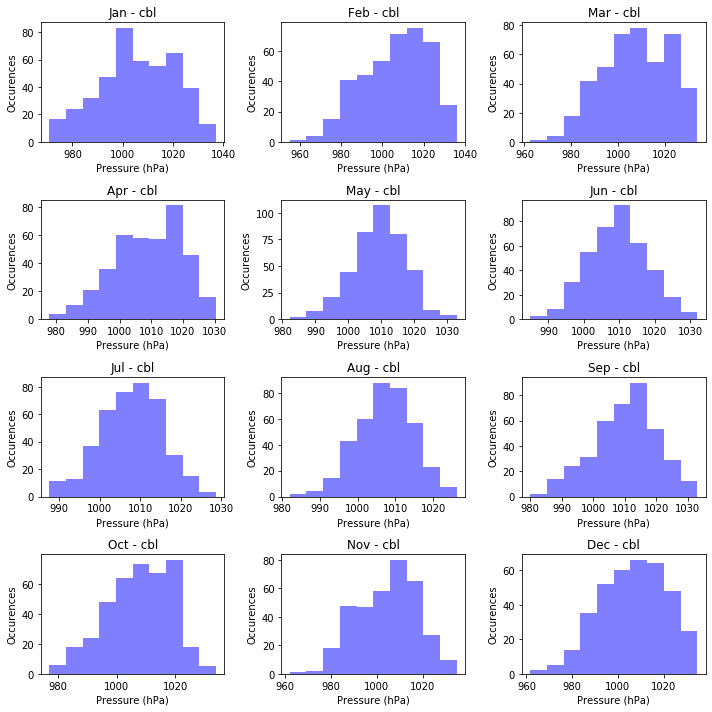

In [130]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
i = 0
for i1 in range(4):
    for i2 in range(3):
        ax = axes[i1][i2]
        ax.hist(mx[i]['cbl'], bins=10, color='blue', alpha=0.5)
        ax.set_xlabel('Pressure (hPa)')
        ax.set_title(months[i] + " - cbl")
        ax.set_ylabel('Occurences')
        i+= 1

plt.tight_layout()
plt.show()

Like for temperature, the data for some of the months looks like it might be Normally distributed, and for others it clearly isn't. Go through the same steps of the Shapiro-Wilks test, then creating simulated data using numpy.random and the KDE.

In [131]:
i=0
norm=[]
nonnorm=[]
for i in range(12):
    stat, p = shapiro(mx[i]['cbl'])
    alpha = 0.05
    if p > alpha:
        print(months[i], " 'cbl' - sample looks Normal")
        norm.append(i)
    else:
        print(months[i], " 'cbl' - sample does not look Normal")
        nonnorm.append(i)
    i+=1 

Jan  'cbl' - sample does not look Normal
Feb  'cbl' - sample does not look Normal
Mar  'cbl' - sample does not look Normal
Apr  'cbl' - sample does not look Normal
May  'cbl' - sample looks Normal
Jun  'cbl' - sample looks Normal
Jul  'cbl' - sample looks Normal
Aug  'cbl' - sample looks Normal
Sep  'cbl' - sample does not look Normal
Oct  'cbl' - sample does not look Normal
Nov  'cbl' - sample does not look Normal
Dec  'cbl' - sample does not look Normal


Generate the non-Normal simulated data:

In [132]:
sim_cbl=[0]*12
for i in nonnorm:
   num=len(mx[i]['cbl'])
   actual_values = mx[i]['cbl']
   sample_pdf = scipy.stats.gaussian_kde(actual_values)
   sim_cbl[i] = sample_pdf.resample(num).T[:,0]

Now generate the Normal simulated data

In [133]:
for i in norm:
   mean=(mx[i]['cbl'].mean())
   std =(mx[i]['cbl'].std())
   num=len(mx[i]['cbl'])
   sim_cbl[i]=np.random.normal(mean,std,num)    

Check what the histograms look like for rainfall :

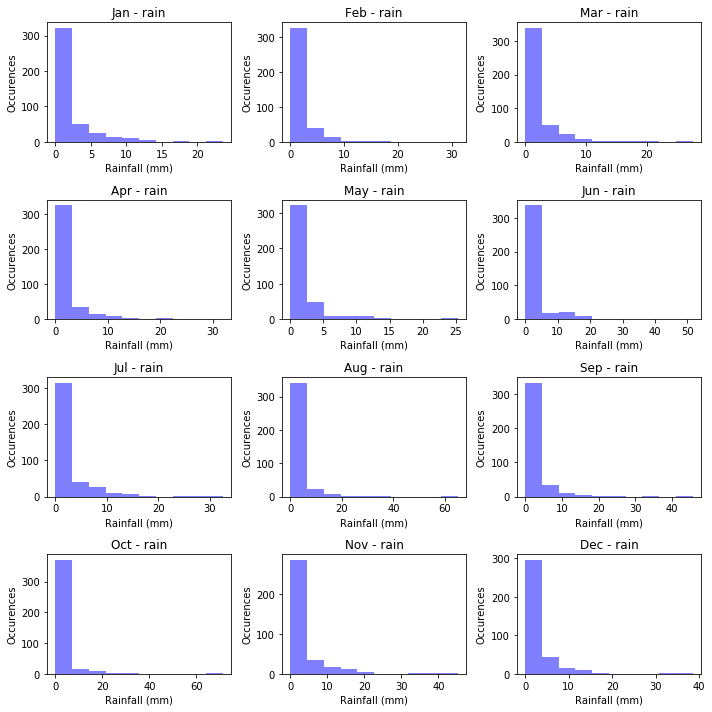

In [134]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
i = 0
for i1 in range(4):
    for i2 in range(3):
        ax = axes[i1][i2]
        ax.hist(mx[i]['rain'], bins=10, color='blue', alpha=0.5)
        ax.set_xlabel('Rainfall (mm)')
        ax.set_title(months[i] + " - rain")
        ax.set_ylabel('Occurences')
        i+= 1

plt.tight_layout()
plt.show()

This data is very clearly not Normally distributed, but as stated above, a team at Maynooth university found a Gamma probability distribution may be used to model rainfall.  

To use the numpy.random.gamma function to generate simulated data we need to calculate the parameters for it - shape and scale. The shape is given by $\frac{mean^2}{variance}$, and the scale by 
$\frac{variance}{mean}$  
(ref https://stats.stackexchange.com/questions/280459/estimating-gamma-distribution-parameters-using-sample-mean-and-std)  

Calculate the mean, variance, then scale and shape for each month for 'rain', and create a simulated dataset using numpy.random.gamma

In [135]:
sim_rain=[]
for i in range(12):
   mean=(mx[i]['rain'].mean())
   var =(mx[i]['rain'].var())
   num=len(mx[i]['rain'])
   scale=(var/mean)
   shape=(mean*mean)/var
   sim_rain.append(np.random.gamma(shape,scale,num)) 

Check what the simulated data look like :

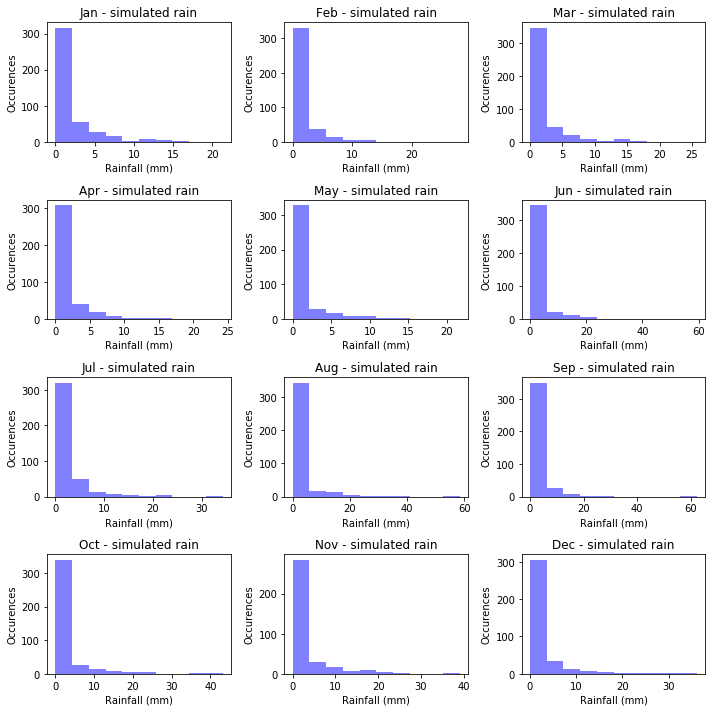

In [136]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
i = 0
for i1 in range(4):
    for i2 in range(3):
        ax = axes[i1][i2]
        ax.hist(sim_rain[i], bins=10, color='blue', alpha=0.5)
        ax.set_xlabel('Rainfall (mm)')
        ax.set_title(months[i] + " - simulated rain")
        ax.set_ylabel('Occurences')
        i+= 1

plt.tight_layout()
plt.show()    

In [137]:
add=False
cols=[]
for col in df.columns:
    if add:
       cols.append(col)
    else:
       add=True
print(cols)  

['maxtp', 'mintp', 'rain', 'cbl']


Check if correlations exist between the variables, eg it would be unsurprising if days with lower minimum temperatures also had lower maximum temperatures. If this is the case we'll use the simulated values of one variable (eg maxtp) to rank the associated simulated values of variables that are correlated with it. We'll use Pearson's and Spearman's correlations to check for relationships between variables. A positive value for the correlation coefficient greater than 0.5 indicates a likely positive relationship, and a negative value of less than -0.5 indicates a likely negative relationship.  
First exclude the 'date' variable from the list of columns, then check each column pair:
(ref https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)

In [138]:
add=False
cols=[]
for col in df.columns:
    if add:
       cols.append(col)
    else:
       add=True
print(cols)  

['maxtp', 'mintp', 'rain', 'cbl']


In [139]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

for ix in range(3):
   for iy in range((3-ix)): 
      for i in range(12):
         corr, _ = pearsonr(mx[i][cols[ix]], mx[i][cols[(ix+iy+1)]])
         if corr > 0.1 or corr < -0.1:
            print(months[i], cols[ix], cols[(ix+iy+1)], " Pearsons correlation : %.3f" % corr)
            
         corr, _ = spearmanr(mx[i][cols[ix]], mx[i][cols[(ix+iy+1)]])
         if corr > 0.1 or corr < -0.1:
            print(months[i], cols[ix], cols[(ix+iy+1)], " Spearmans correlation : %.3f" % corr) 
                 

Jan maxtp mintp  Pearsons correlation : 0.738
Jan maxtp mintp  Spearmans correlation : 0.715
Feb maxtp mintp  Pearsons correlation : 0.664
Feb maxtp mintp  Spearmans correlation : 0.667
Mar maxtp mintp  Pearsons correlation : 0.550
Mar maxtp mintp  Spearmans correlation : 0.575
Apr maxtp mintp  Pearsons correlation : 0.446
Apr maxtp mintp  Spearmans correlation : 0.411
May maxtp mintp  Pearsons correlation : 0.535
May maxtp mintp  Spearmans correlation : 0.517
Jun maxtp mintp  Pearsons correlation : 0.500
Jun maxtp mintp  Spearmans correlation : 0.499
Jul maxtp mintp  Pearsons correlation : 0.465
Jul maxtp mintp  Spearmans correlation : 0.465
Aug maxtp mintp  Pearsons correlation : 0.480
Aug maxtp mintp  Spearmans correlation : 0.463
Sep maxtp mintp  Pearsons correlation : 0.496
Sep maxtp mintp  Spearmans correlation : 0.441
Oct maxtp mintp  Pearsons correlation : 0.609
Oct maxtp mintp  Spearmans correlation : 0.568
Nov maxtp mintp  Pearsons correlation : 0.744
Nov maxtp mintp  Spearma

There's a strong positive correlation for Jan, Feb, Mar, May, Oct, Nov and Dec between max and min temperature, with a weak correlation for the other months, and a weak negative correlation between rainfall and pressure (cbl).  
For these two variable pairs check the correlation between the simulated data sets we've generated:

In [140]:
for i in range(12):
   corr, _ = pearsonr(sim_maxtp[i], sim_mintp[i])
   print(months[i], "maxtp mintp Pearsons correlation : %.3f" % corr)
   corr, _ = spearmanr(sim_maxtp[i], sim_mintp[i])
   print(months[i], "maxtp mintp Spearmans correlation : %.3f" % corr)

Jan maxtp mintp Pearsons correlation : -0.065
Jan maxtp mintp Spearmans correlation : -0.056
Feb maxtp mintp Pearsons correlation : 0.014
Feb maxtp mintp Spearmans correlation : 0.013
Mar maxtp mintp Pearsons correlation : 0.042
Mar maxtp mintp Spearmans correlation : 0.026
Apr maxtp mintp Pearsons correlation : 0.044
Apr maxtp mintp Spearmans correlation : 0.052
May maxtp mintp Pearsons correlation : -0.061
May maxtp mintp Spearmans correlation : -0.054
Jun maxtp mintp Pearsons correlation : 0.003
Jun maxtp mintp Spearmans correlation : -0.003
Jul maxtp mintp Pearsons correlation : -0.015
Jul maxtp mintp Spearmans correlation : 0.005
Aug maxtp mintp Pearsons correlation : -0.031
Aug maxtp mintp Spearmans correlation : -0.035
Sep maxtp mintp Pearsons correlation : -0.072
Sep maxtp mintp Spearmans correlation : -0.061
Oct maxtp mintp Pearsons correlation : -0.042
Oct maxtp mintp Spearmans correlation : -0.041
Nov maxtp mintp Pearsons correlation : -0.104
Nov maxtp mintp Spearmans correl

The above shows no correlation, so we'll order min temp according to max temp for these months, by ranking the values for both, and retaining the max temp order. Check the rain-cbl pair too:

In [141]:
for i in range(12):
   corr, _ = pearsonr(sim_rain[i], sim_cbl[i])
   print(months[i], "rain cbl Pearsons correlation : %.3f" % corr)
   corr, _ = spearmanr(sim_rain[i], sim_cbl[i])
   print(months[i], "rain cbl Spearmans correlation : %.3f" % corr)

Jan rain cbl Pearsons correlation : 0.045
Jan rain cbl Spearmans correlation : 0.076
Feb rain cbl Pearsons correlation : -0.098
Feb rain cbl Spearmans correlation : -0.115
Mar rain cbl Pearsons correlation : -0.088
Mar rain cbl Spearmans correlation : -0.064
Apr rain cbl Pearsons correlation : 0.012
Apr rain cbl Spearmans correlation : -0.032
May rain cbl Pearsons correlation : 0.024
May rain cbl Spearmans correlation : -0.038
Jun rain cbl Pearsons correlation : 0.141
Jun rain cbl Spearmans correlation : 0.098
Jul rain cbl Pearsons correlation : 0.024
Jul rain cbl Spearmans correlation : 0.008
Aug rain cbl Pearsons correlation : 0.061
Aug rain cbl Spearmans correlation : -0.092
Sep rain cbl Pearsons correlation : -0.034
Sep rain cbl Spearmans correlation : -0.028
Oct rain cbl Pearsons correlation : 0.013
Oct rain cbl Spearmans correlation : -0.008
Nov rain cbl Pearsons correlation : -0.005
Nov rain cbl Spearmans correlation : -0.018
Dec rain cbl Pearsons correlation : -0.081
Dec rain c

Again, there is no correlation between the two, so we'll apply an order to the simulated data here too.  

First maxtp mintp:  
We'll check the impact of applying order to one month, December, where there is a high coefficient between 'maxtp' and 'mintp'.  
Get the average of the 2 correlation coefficients for the actual data, and subtract the average of the 2 coefficients for the simulated data, then rank the values in the simulated data for 'maxtp' and apply that rank to a proportion (according to the coefficient values) of a sorted version of the 'mintp' data. The remaining 'mintp' simulated data will be left unranked. We'll display the coefficients for the actual data, the unprocessed simulated data and the processed simulated data.
(ref https://stackoverflow.com/questions/32655605/python-rank-a-list-of-number-string-convert-list-elements-to-ordinal-value)  
(ref https://thispointer.com/find-the-index-of-a-value-in-numpy-array/)
(ref https://thispointer.com/delete-elements-from-a-numpy-array-by-value-or-conditions-in-python/)

In [142]:
sim_save=sim_mintp[11]
corr1, _ = pearsonr(mx[11]['maxtp'], mx[11]['mintp'])
print("Pearsons correlation actual data: %.3f" % corr1)
corr2, _ = spearmanr(mx[11]['maxtp'], mx[11]['mintp'])
print("Spearmans correlation actual data : %.3f" % corr2)
print('-------------------------------')
corr3, _ = pearsonr(sim_maxtp[11], sim_mintp[11])
print("Pearsons correlation unsorted simulated data: %.3f" % corr3)
corr4, _ = spearmanr(sim_maxtp[11], sim_mintp[11])
print("Spearmans correlation unsorted simulated data: %.3f" % corr4)

corr=(((corr1+corr2)/2)-((corr3+corr4)/2))

l = np.array(sim_maxtp[11])
s = pd.Series(l)
ln=s.rank(method='dense')
num=len(sim_mintp[11])
num=int(num*corr)
sim_mintp_sorted=np.sort(sim_mintp[11])
sim_mintp_new=[]
for i in range(num):
    lni=int(ln[i])
    val=sim_mintp_sorted[(lni-1)]
    sim_mintp_new.append(val)
    result = np.where(sim_save == val)
    sim_save = np.delete(sim_save, result[0][0])

num=len(sim_save)
for i in range(num):
    sim_mintp_new.append(sim_save[i])    
    
print('-------------------------------')    
corrx, _ = pearsonr(sim_maxtp[11], sim_mintp_new)
print("Pearsons correlation sorted simulated data: %.3f" % corrx)
corrx, _ = spearmanr(sim_maxtp[11], sim_mintp_new)
print("Spearmans correlation sorted simulated data: %.3f" % corrx)    

Pearsons correlation actual data: 0.801
Spearmans correlation actual data : 0.768
-------------------------------
Pearsons correlation unsorted simulated data: 0.068
Spearmans correlation unsorted simulated data: 0.043
-------------------------------
Pearsons correlation sorted simulated data: 0.719
Spearmans correlation sorted simulated data: 0.732


In [143]:
for ix in range(12):
   sim_save=sim_mintp[ix]
   corr1, _ = pearsonr(mx[ix]['maxtp'], mx[ix]['mintp'])
   corr2, _ = spearmanr(mx[ix]['maxtp'], mx[ix]['mintp'])
   corr3, _ = pearsonr(sim_maxtp[ix], sim_mintp[ix])
   corr4, _ = spearmanr(sim_maxtp[ix], sim_mintp[ix])
   corr=(((corr1+corr2)/2)-((corr3+corr4)/2))
   l = np.array(sim_maxtp[ix])
   s = pd.Series(l)
   ln=s.rank(method='dense')
   num=len(sim_mintp[ix])
   num=int(num*corr)
   sim_mintp_sorted=np.sort(sim_mintp[ix])
   sim_mintp_new[ix]=[]
   for i in range(num):
      lni=int(ln[i])
      val=sim_mintp_sorted[(lni-1)]
      sim_mintp_new[ix].append(val)
      result = np.where(sim_save == val)
      sim_save = np.delete(sim_save, result[0][0])

   num=len(sim_save)
   for i in range(num):
      sim_mintp_new[ix].append(sim_save[i])  
   print(months[ix], " - Pearsons correlation actual data: %.3f" % corr1)
   print(months[ix], " - Spearmans correlation actual data : %.3f" % corr2)
   print(months[ix], " - Pearsons correlation unsorted simulated data: %.3f" % corr3)
   print(months[ix], " - Spearmans correlation unsorted simulated data: %.3f" % corr4)    
   corr3, _ = pearsonr(sim_maxtp[ix], sim_mintp_new[ix])
   corr4, _ = spearmanr(sim_maxtp[ix], sim_mintp_new[ix])    
   print(months[ix], " - Pearsons correlation sorted simulated data: %.3f" % corr3)
   print(months[ix], " - Spearmans correlation sorted simulated data: %.3f" % corr4)     

Jan  - Pearsons correlation actual data: 0.738
Jan  - Spearmans correlation actual data : 0.715
Jan  - Pearsons correlation unsorted simulated data: -0.065
Jan  - Spearmans correlation unsorted simulated data: -0.056
Jan  - Pearsons correlation sorted simulated data: 0.768
Jan  - Spearmans correlation sorted simulated data: 0.787
Feb  - Pearsons correlation actual data: 0.664
Feb  - Spearmans correlation actual data : 0.667
Feb  - Pearsons correlation unsorted simulated data: 0.014
Feb  - Spearmans correlation unsorted simulated data: 0.013
Feb  - Pearsons correlation sorted simulated data: 0.668
Feb  - Spearmans correlation sorted simulated data: 0.662
Mar  - Pearsons correlation actual data: 0.550
Mar  - Spearmans correlation actual data : 0.575
Mar  - Pearsons correlation unsorted simulated data: 0.042
Mar  - Spearmans correlation unsorted simulated data: 0.026
Mar  - Pearsons correlation sorted simulated data: 0.589
Mar  - Spearmans correlation sorted simulated data: 0.568
Apr  - P

Sorting 'mintp' according to the 'maxtp' values for December has given us a correlation between the two similar to that for the actual data. We'll apply this to all months for 'maxtp' and 'mintp': 

In [169]:
#sim_cbl_new=[]
for ix in range(12):
   sim_save=sim_cbl[ix]
   corr1, _ = pearsonr(mx[ix]['rain'], mx[ix]['cbl'])
   corr2, _ = spearmanr(mx[ix]['rain'], mx[ix]['cbl'])
   corr=(-1)*((corr1+corr2)/2)
   l = np.array(sim_rain[ix])
   s = pd.Series(l)
   ln=s.rank(method='dense')
   num=len(sim_cbl[ix])
#   sim_cbl_new=num*[0]
   num2=int(num*corr)
   sim_cbl_sorted=np.sort(sim_cbl[ix])
   sim_cbl_new[ix]=[]
   for i in range(num2):
      lni=num-int(ln[i])
      val=sim_cbl_sorted[(lni-1)]
      sim_cbl_new[ix].append(val)
      result = np.where(sim_save == val)
      sim_save = np.delete(sim_save, result[0][0])

   num=len(sim_save)
   for i in range(num):
      sim_cbl_new[ix].append(sim_save[i])  
   print(ix) 
   print(sim_cbl_new[ix]) 
#   print(months[ix], " - Pearsons correlation actual data: %.3f" % corr1)
#   print(months[ix], " - Spearmans correlation actual data : %.3f" % corr2)
   corr3, _ = pearsonr(sim_rain[ix], sim_cbl_new[ix])
   corr4, _ = spearmanr(sim_rain[ix], sim_cbl_new[ix])    
#   print(months[ix], " - Pearsons correlation sorted simulated data: %.3f" % corr3)
#   print(months[ix], " - Spearmans correlation sorted simulated data: %.3f" % corr4)     

0
[999.4997724893559, 998.3627842859493, 995.9159543578683, 1024.1104617997978, 1004.434253865813, 986.7755723458647, 994.0522795449791, 1015.3921026394919, 994.028624746971, 1017.700657555564, 1000.1687962369502, 998.0766968649697, 996.0853222344729, 975.3710183171329, 1019.9988482803197, 998.4670424308817, 1013.4317707973593, 1006.2325140281381, 980.3945599018641, 1000.2385187529367, 1002.2865076852013, 1012.1868838298954, 1030.295569067833, 1012.9847920306795, 981.3844653428491, 989.0331335208535, 994.3060903815273, 1016.5679752153054, 1021.6506368817797, 1014.4342152325463, 985.0671592648786, 1042.3983455471894, 987.5080626905263, 1014.0563022437783, 1003.5590117580905, 1031.6091373891084, 1026.795494973505, 1021.4033241737721, 982.6572644175106, 1012.9977488826067, 982.6756355537032, 1030.511088315302, 1001.1186822528853, 980.3303280662692, 983.7358396289593, 997.9887717154749, 996.4946551424993, 1005.6720892726362, 1021.6835598588718, 1025.093299514889, 1007.1220353170685, 1034.3

In [149]:
spx_maxtp=[]
for i in range(12):
    spx_maxtp.append(np.random.choice(sim_maxtp[i],ndays[i],replace=False))    

In [83]:
my={}
i=0
ymeans=[]
labels=['Max Temp (C)','Min Temp (C)', 'Rainfall (mm)', 'Pressure (hPa)']
a1=np.array(years, dtype=float)
for mon in months:
   ymean=[]
   for y in yearx:
      my=mx[i][mx[i]['date'].str.contains(y)] 
      ymean.append(my['maxtp'].mean())
   ymeans.append(ymean)
   i+=1 

(ref https://stackoverflow.com/questions/28647172/numpy-polyfit-doesnt-handle-nan-values)
(ref https://stackoverflow.com/questions/54603873/bokeh-plot-regression-lines-on-scatter-plot)

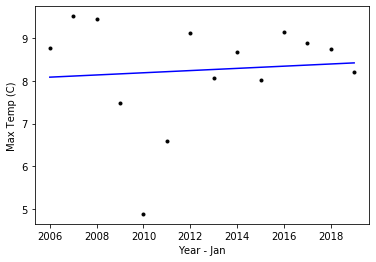

In [187]:
i=0
madds_maxtp=[]
for mon in months:
   a2=np.array(ymeans[i])
   idx = np.isfinite(a1) & np.isfinite(a2)
   par = np.polyfit(a1[idx], a2[idx], 1, full=True)
   slope=par[0][0]
   madds_maxtp.append(mfac*slope) 
   if i==0:
      intercept=par[0][1]
      plt.plot(a1, a2, 'k.')
      plt.plot(a1, (slope*a1)+intercept, 'b-')
      xlab='Year - '+months[i]
      plt.xlabel(xlab)
      plt.ylabel(labels[0])
      plt.show()
   i+=1

In [194]:
my={}
i=0
madds_mintp=[]
for mon in months:
   ymean=[]
   for y in yearx:
      my=mx[i][mx[i]['date'].str.contains(y)] 
      ymean.append(my['mintp'].mean())
   a2=np.array(ymean)
   idx = np.isfinite(a1) & np.isfinite(a2)
   par = np.polyfit(a1[idx], a2[idx], 1, full=True)
   slope=par[0][0]
   madds_mintp.append(mfac*slope) 
   i+=1 

In [195]:
my={}
i=0
madds_rain=[]
for mon in months:
   ymean=[]
   for y in yearx:
      my=mx[i][mx[i]['date'].str.contains(y)] 
      ymean.append(my['rain'].mean())
   a2=np.array(ymean)
   idx = np.isfinite(a1) & np.isfinite(a2)
   par = np.polyfit(a1[idx], a2[idx], 1, full=True)
   slope=par[0][0]
   madds_rain.append(mfac*slope) 
   i+=1 

In [196]:
my={}
i=0
madds_cbl=[]
for mon in months:
   ymean=[]
   for y in yearx:
      my=mx[i][mx[i]['date'].str.contains(y)] 
      ymean.append(my['cbl'].mean())
   a2=np.array(ymean)
   idx = np.isfinite(a1) & np.isfinite(a2)
   par = np.polyfit(a1[idx], a2[idx], 1, full=True)
   slope=par[0][0]
   madds_cbl.append(mfac*slope) 
   i+=1 

(ref https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html)

In [235]:
rxs=0
spx_maxtp=[]
spx_mintp=[]
spx_rain=[]
spx_cbl=[]
spx_maxtp_new=[]
spx_mintp_new=[]
spx_rain_new=[]
spx_cbl_new=[]
for i in range(12):
    spx_maxtp.append(np.random.choice(sim_maxtp[i],ndays[i],replace=False)) 
    spx_mintp.append(np.random.choice(sim_mintp_new[i],ndays[i],replace=False))  
    spx_rain.append(np.random.choice(sim_rain[i],ndays[i],replace=False)) 
    spx_cbl.append(np.random.choice(sim_cbl_new[i],ndays[i],replace=False))  
    for num in range(len(spx_maxtp[i])):
        spx_maxtp_new.append(round(spx_maxtp[i][num] + madds_maxtp[i],1))
    for num in range(len(spx_mintp[i])):
        spx_mintp_new.append(round(spx_mintp[i][num] + madds_mintp[i]))
    for num in range(len(spx_rain[i])):
        rx=spx_rain[i][num] + madds_rain[i]
        if rx < 0:
           rxs=rxs+rx
           rx=0
        else:
           if rx > 0 and rxs < 0:
              if (rx-rxs) < 0:
                 rxs=rxs+rx
                 rx=0
              else:
                 rx=rx-rxs
                 rxs=0
        spx_rain_new.append(round(rx))
    for num in range(len(spx_cbl[i])):
        spx_cbl_new.append(round(spx_cbl[i][num] + madds_cbl[i]))        
print(spx_rain_new)    

[0.0, 5.0, 2.0, 0.0, 1.0, 1.0, 8.0, 9.0, 2.0, 0.0, 3.0, 4.0, 1.0, 2.0, 4.0, 1.0, 0.0, 1.0, 1.0, 0.0, 4.0, 2.0, 2.0, 0.0, 2.0, 0.0, 14.0, 12.0, 0.0, 1.0, 0.0, 0, 12.0, 0, 1.0, 0.0, 0.0, 3.0, 20.0, 0, 5.0, 0, 0, 1.0, 3.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24.0, 0.0, 1.0, 1.0, 10.0, 0.0, 1.0, 2.0, 3.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 0.0, 9.0, 2.0, 14.0, 1.0, 0.0, 0.0, 4.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 4.0, 1.0, 7.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 3.0, 1.0, 1.0, 1.0, 1.0, 12.0, 1.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 6.0, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0, 3.0, 0.0, 10.0, 7.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 15.0, 3.0, 0, 0, 0, 5.0, 0, 10.0, 0, 0, 0, 11.0, 12.0, 0, 0, 0, 11.0, 10.0, 0, 0, 4.0, 3.0, 0, 0, 0, 29.0, 2.0, 0, 0, 4.0, 0, 0, 0, 0, 4.0, 0, 0, 3.0, 0, 7.0, 0, 0, 0, 0, 0, 0, 0, 12.0, 0, 0, 0, 0, 0, 8.0, 1.0, 0, 0, 0, 0, 0, 13.0, 0, 0, 10.0, 0, 0, 1.0, 0, 0, 0, 0, 3

(ref https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python)

In [206]:
from datetime import date
from datetime import datetime

curr_year = curr_datetime.year
next_year=curr_year+1
req_date = date(year=next_year,month=1,day=1)
print(req_date)
#base = datetime.datetime.today()
#date_list = [base + datetime.timedelta(days=x) for x in range(numdays)]

NameError: name 'curr_datetime' is not defined

(ref https://stackoverflow.com/questions/15834244/how-to-map-multiple-lists-to-one-dictionary)

In [232]:
list_of_lists = [odates,spx_mintp_new,spx_maxtp_new,spx_rain_new,spx_cbl_new]
{z[0]:list(z[1:]) for z in zip(*list_of_lists)} 

{'01-Jan-20': [3.0, 13.0, 0.0, 1018.0],
 '02-Jan-20': [5.0, 7.9, 0.0, 1026.0],
 '03-Jan-20': [3.0, 5.7, 1.0, 1005.0],
 '04-Jan-20': [6.0, 10.3, 0.0, 1011.0],
 '05-Jan-20': [3.0, 12.3, 2.0, 982.0],
 '06-Jan-20': [2.0, 10.6, 3.0, 1004.0],
 '07-Jan-20': [1.0, 8.9, 0.0, 999.0],
 '08-Jan-20': [0.0, 11.5, 0.0, 997.0],
 '09-Jan-20': [1.0, 13.9, 0.0, 1020.0],
 '10-Jan-20': [3.0, 4.6, 2.0, 1015.0],
 '11-Jan-20': [2.0, 13.3, 0.0, 996.0],
 '12-Jan-20': [5.0, 11.0, 0.0, 978.0],
 '13-Jan-20': [4.0, 11.4, 0.0, 1016.0],
 '14-Jan-20': [-2.0, 12.6, 0.0, 985.0],
 '15-Jan-20': [2.0, 11.4, 2.0, 1020.0],
 '16-Jan-20': [-0.0, 4.6, 0.0, 996.0],
 '17-Jan-20': [2.0, 3.4, 0.0, 987.0],
 '18-Jan-20': [3.0, 5.0, 1.0, 1023.0],
 '19-Jan-20': [7.0, 9.6, 2.0, 1005.0],
 '20-Jan-20': [0.0, 4.6, 2.0, 1009.0],
 '21-Jan-20': [-2.0, 5.5, 0.0, 988.0],
 '22-Jan-20': [2.0, 12.7, 0.0, 982.0],
 '23-Jan-20': [-4.0, 6.3, 1.0, 1006.0],
 '24-Jan-20': [1.0, 8.3, 3.0, 1041.0],
 '25-Jan-20': [6.0, 12.7, 1.0, 977.0],
 '26-Jan-20': [5.0,